<a href="https://colab.research.google.com/github/abhishinde24/Short-term-Forecasting-of-Load-and-Solar-Energy-in-a-Smart-Grid/blob/main/ew_brown_solar_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import io
df = pd.read_csv('/content/sample_data/hourly_data_hour_2017 _(2).csv',infer_datetime_format=True,parse_dates=['Timestamp'],index_col=['Timestamp'])
# df = pd.read_csv(io.BytesIO(uploaded['dataest01.xlsx']),encoding= 'unicode_escape')


In [ ]:
# df.isnull().sum()
df.head(-1)

,POAI,GHI,TmpF,TmpC,RH2M,ALLSKY_SFC_LW_DWN,EKPC_MW,solar_generation
Timestamp,,,,,,,,
2017-01-01 00:00:00,0.125905,0.275391,41.192631,5.107017,99.81,322.52,1165,5.552635e+05
2017-01-01 01:00:00,0.227239,0.334206,41.333620,5.185344,99.00,319.42,1437,5.552646e+05
2017-01-01 02:00:00,0.328573,0.393020,41.474609,5.263672,98.00,322.35,1402,5.552652e+05
2017-01-01 03:00:00,0.429907,0.451835,41.615598,5.341999,100.00,324.80,1365,5.552641e+05
2017-01-01 04:00:00,0.531242,0.510649,41.756587,5.420326,100.00,322.77,1344,5.552651e+05
...,...,...,...,...,...,...,...,...
2017-12-31 18:00:00,-0.978869,-0.891097,15.385695,-9.230170,68.81,198.48,2505,1.282277e+06
2017-12-31 19:00:00,-1.054464,-0.975144,13.923586,-10.042452,72.12,200.30,2614,1.282256e+06
2017-12-31 20:00:00,-0.662855,-0.964197,13.218852,-10.433971,74.81,209.88,2633,1.282243e+06


In [ ]:
# df.drop(['Year',"Month","Day","Hour","Minute"],axis=1,inplace=True)

In [ ]:
df.isnull().sum()


POAI                   0
GHI                    0
TmpF                 194
TmpC                   0
RH2M                   0
ALLSKY_SFC_LW_DWN      0
EKPC_MW                0
solar_generation     167
dtype: int64

In [ ]:
#replacing nan value with mean of columns
# df['kWh'].fillna(value=df['kWh'].mean(), inplace=True)
df['POAI'].fillna(value=df['POAI'].mean(), inplace=True)
df['GHI'].fillna(value=df['GHI'].mean(), inplace=True)
df['TmpC'].fillna(value=df['TmpC'].mean(), inplace=True)
# df['ALLSKY_SFC_SW_DWN'].fillna(value=df['ALLSKY_SFC_SW_DWN'].mean(), inplace=True)
# df['ALLSKY_SFC_UVB'].fillna(value=df['ALLSKY_SFC_UVB'].mean(), inplace=True)
# df['ALLSKY_SFC_UVA'].fillna(value=df['ALLSKY_SFC_UVA'].mean(), inplace=True)
# df['T2M'].fillna(value=df['T2M'].mean(), inplace=True)
# df['T2MWET'].fillna(value=df['T2MWET'].mean(), inplace=True)
# df['PRECTOTCORR'].fillna(value=df['PRECTOTCORR'].mean(), inplace=True)
# df['CLRSKY_SFC_SW_DWN'].fillna(value=df['CLRSKY_SFC_SW_DWN'].mean(), inplace=True)
# df['SZA'].fillna(value=df['SZA'].mean(), inplace=True)




df['solar_generation'].fillna(value=df['solar_generation'].mean(), inplace=True)

In [ ]:
# df['solar_generation'] = df['kW']+df['kWh']/24


In [ ]:
df.drop(["EKPC_MW",'TmpF'],axis=1,inplace=True)

In [ ]:
# daily_groups = df.resample('D')
daily_groups = df.resample('D')
df = daily_groups.mean()

In [ ]:
# df_new = pd.DataFrame()
# df_new['GHI']=df_ghi
# df_new['TmpC']=df_Tmp
# df_new['Solar_gen']=df_solar
# df_new['poai']=df_poai

In [ ]:
df.head()
# df_new.to_csv('hourly_data.csv')

,POAI,GHI,TmpC,RH2M,ALLSKY_SFC_LW_DWN,solar_generation
Timestamp,,,,,,
2017-01-01,29.792090,30.240796,6.787800,95.215000,327.026250,555821.100992
2017-01-02,38.425344,37.795246,12.609035,94.974583,334.139167,556348.974354
2017-01-03,24.328519,24.796402,13.082318,94.717083,349.790000,556556.717817
2017-01-04,190.488477,128.726044,0.211108,70.852083,240.212083,559778.910658
2017-01-05,33.378624,33.096431,-4.715096,73.495000,278.391667,558881.865904


In [ ]:
# df=df_new
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Freq: D
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   POAI               365 non-null    float64
 1   GHI                365 non-null    float64
 2   TmpC               365 non-null    float64
 3   RH2M               365 non-null    float64
 4   ALLSKY_SFC_LW_DWN  365 non-null    float64
 5   solar_generation   365 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


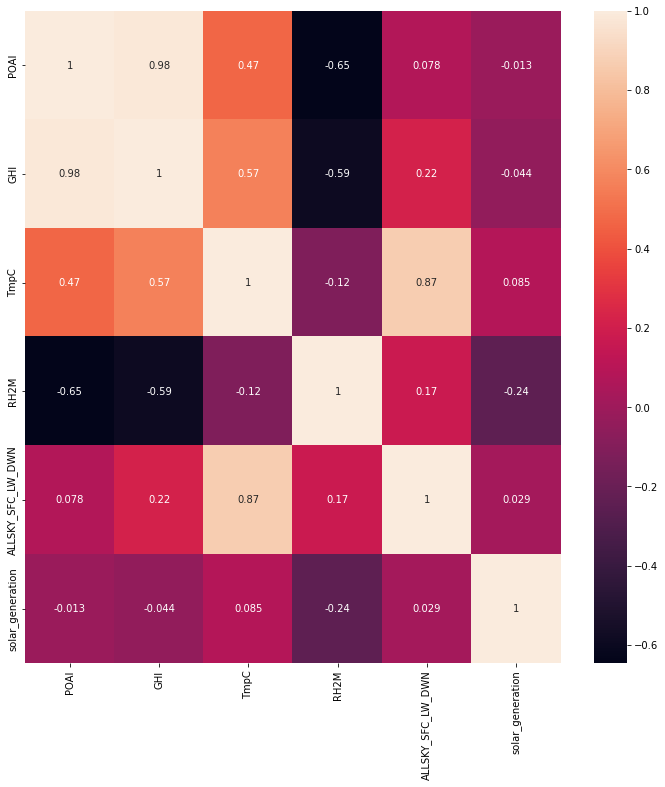

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [ ]:
# Var_Corr[Var_Corr['generation solar'] < -0.05].colum
# Var_Corr['generation solar']<-0.05
corr_value=[2,3,4,5]
out_value=[5]

In [ ]:
len(df)

365

In [ ]:
# split a univariate dataset into train/test sets
def split_dataset(data,output=7):
	# split into standard weeks
	i=0
	while i > -output:
		i=i-7
	j=-i
	while j>0:
		j=j-7
  # print(i)
  # print(j)
	train, test = data[j+8:i], data[i:]
	# restructure into windows of weekly data
	train = array(split(train, len(train)/7))
	test = array(split(test, len(test)/7))
	return train,test

In [ ]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.metrics import mean_absolute_percentage_error

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores
 
# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))
 
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			X.append(data[in_start:in_end, corr_value])
			y.append(data[in_end:out_end, out_value])
		# move along one time step
		in_start += 1
	return array(X), array(y)
 
# train the model
def build_model(train, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 50, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model
 
# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, corr_value]
	# reshape into [1, n_input, n]
	input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat
 
# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, out_value], predictions)
	return predictions

In [ ]:
# calculating precentage error
def cal_error(y,x):
    return mean_absolute_percentage_error(y,x)


In [ ]:
output=35
train, test = split_dataset(df,output)
model = build_model(train, n_input=7)

In [ ]:
pred = evaluate_model(train,test, n_input=7)

In [ ]:
# print(score)
# print(scores)

In [ ]:
test = test[:,:,out_value].reshape(test[:,:,out_value].shape[0]*test[:,:,out_value].shape[1])
pred = pred[:,:].reshape(pred[:,:].shape[0]*pred[:,:].shape[1])

In [ ]:
# print(test)
# print(pred)
print("percentage error is : ",cal_error(test,pred)*100)

percentage error is :  1.2942722967596674


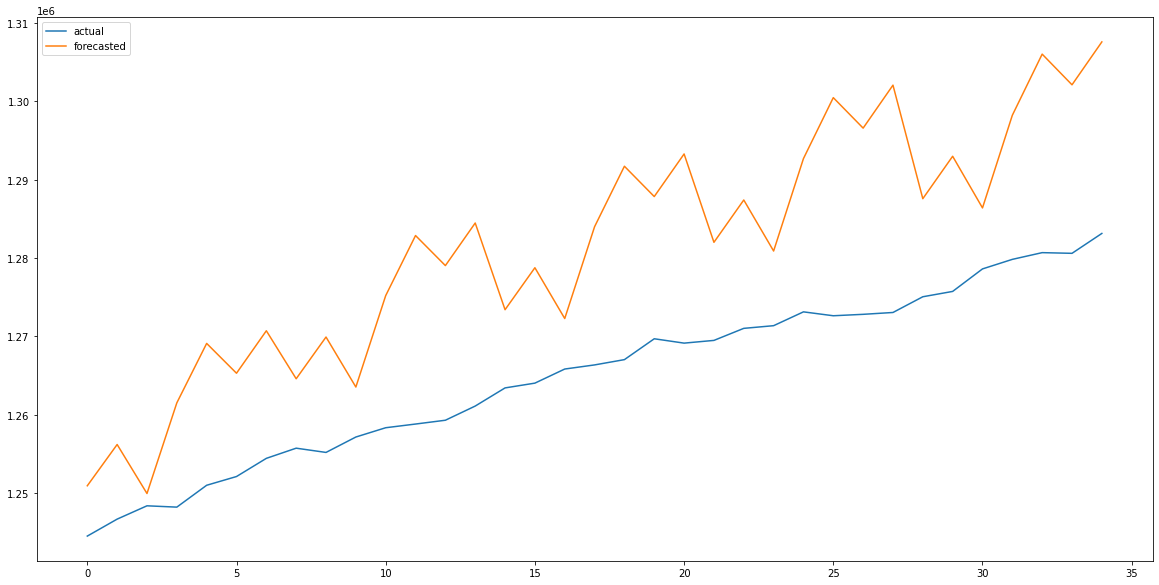

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(test)
# test[:,:,10].shapecolab
plt.plot(pred)
plt.gca().legend(('actual','forecasted'))
plt.show()


In [ ]:
# output=pd.DataFrame([df.index[-35:] , test, pred])

In [ ]:
# output.head(35)

In [ ]:
# output.to_csv('final.csv')